In [36]:
import pandas as pd
from sklearn import svm
from sklearn.svm import SVR

# SVM -- Regression 

In [37]:
data=pd.read_csv("Salary_Data.csv")

In [38]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [39]:
data.shape

(30, 2)

In [40]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [41]:
feature=data.iloc[:,0:1]
feature=feature.values.reshape(-1,1)
label=data['Salary']
label=label.values.reshape(-1,1)



In [42]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
feature = sc_X.fit_transform(feature)
label = sc_y.fit_transform(label)



In [43]:
reg=SVR()

In [44]:
reg.fit(feature,label)

E:\Suban\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
reg.score(feature,label)

0.9649420157173133

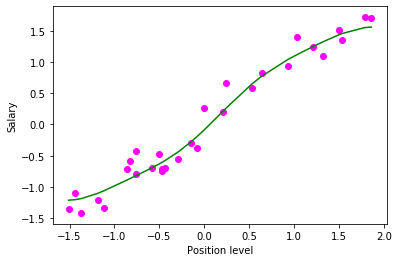

In [46]:
import matplotlib.pyplot as plt


plt.scatter(feature, label, color = 'magenta')
plt.plot(feature,reg.predict(feature), color = 'green')

plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

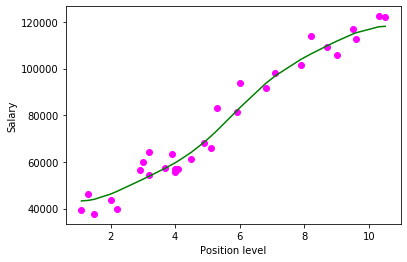

In [47]:
import matplotlib.pyplot as plt


plt.scatter(sc_X.inverse_transform(feature), sc_y.inverse_transform(label), color = 'magenta')
plt.plot(sc_X.inverse_transform(feature), sc_y.inverse_transform(reg.predict(feature)), color = 'green')

plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [48]:
pred=reg.predict(sc_X.transform([[4.1]]))
pred

array([-0.57631192])

In [49]:
sc_y.inverse_transform(pred)

array([60469.29008332])

# SVM -- Classification 

In [50]:
data=pd.read_csv("Bank-data.csv")

In [51]:
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [52]:
data.shape

(518, 8)

In [53]:

data['y'] = data['y'].map({'yes':1, 'no':0})

In [54]:
feat=data.iloc[:,1:7]
label=data['y']

In [55]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
feat=sc_x.fit_transform(feat)

In [199]:
pred=svm.SVC(C = 0.4, cache_size=250, degree = 4, gamma='auto', kernel = 'r')

In [200]:
from sklearn.model_selection import train_test_split

feat_train,feat_test,label_train,label_test=train_test_split(feat,label,test_size=0.2)

In [201]:
pred.fit(feat_train,label_train)

SVC(C=0.4, break_ties=False, cache_size=250, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [202]:
pred.score(feat_train,label_train)

0.857487922705314

In [203]:
label_pred=pred.predict(feat_test)

In [204]:
from sklearn.metrics import r2_score

r2_score(label_pred,label_test)

0.649175412293853